# Model Building

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import cross_validation, metrics   #Additional scklearn functions

import xgboost
from xgboost.sklearn import XGBClassifier
from xgboost.sklearn import XGBRegressor

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split  
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score

from xgboost import plot_importance
from matplotlib import pyplot
import pprint
%matplotlib inline

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

from scipy.stats import randint

from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [43]:
voice = pd.read_csv("voiceN.csv", index_col=0)
voice.shape
voice.index=voice.id
voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label,id
id,,,,,,,,,,,,,,,,,,,,,
1,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,0.0,1
2,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,0.0,2
3,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,0.0,3
4,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,0.0,4
5,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,0.0,5


In [46]:
voice_data=voice.iloc[:,0:20]
#voice_data.head()
voice_target=voice['label']

# Split Train & Test

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(voice_data, voice_target, test_size=0.20, random_state=101)

# Logistic

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
predictions_lg = logmodel.predict(X_test)

In [13]:
from sklearn.metrics import classification_report

In [14]:
print(classification_report(y_test,predictions_lg))

             precision    recall  f1-score   support

        0.0       0.86      0.97      0.91       325
        1.0       0.96      0.83      0.89       309

avg / total       0.91      0.90      0.90       634



In [33]:
logmodel.score(X_test, y_test)
log_scores = cross_val_score(logmodel,voice_data, voice_target, cv=5)
print("CV Accuracy: %0.2f (+/- %0.2f)" % (log_scores.mean(), log_scores.std() * 2))

CV Accuracy: 0.88 (+/- 0.16)


# SVM

In [18]:
from sklearn.svm import SVC

In [19]:
clf = SVC(kernel='linear', C=1).fit(X_train, y_train)

In [20]:
predictions_svm = clf.predict(X_test)

In [21]:
from sklearn.metrics import classification_report,confusion_matrix

In [22]:
print(classification_report(y_test,predictions_svm))

             precision    recall  f1-score   support

        0.0       0.88      0.98      0.93       325
        1.0       0.97      0.86      0.91       309

avg / total       0.93      0.92      0.92       634



In [23]:
print(confusion_matrix(y_test,predictions_svm))
accuracy=confusion_matrix(y_test,predictions_svm).trace()/confusion_matrix(y_test,predictions_svm).sum()
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[[318   7]
 [ 44 265]]
Accuracy: 91.96%


In [34]:
scores = cross_val_score(clf,voice_data, voice_target, cv=5)
print("CV Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

CV Accuracy: 0.92 (+/- 0.12)


 ## Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dtree = DecisionTreeClassifier()

In [27]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [28]:
predictions_dtree = dtree.predict(X_test)

In [29]:
from sklearn.metrics import classification_report,confusion_matrix

In [30]:
print(classification_report(y_test,predictions_dtree))

             precision    recall  f1-score   support

        0.0       0.96      0.97      0.96       325
        1.0       0.96      0.95      0.96       309

avg / total       0.96      0.96      0.96       634



In [31]:
print(confusion_matrix(y_test,predictions_dtree))
accuracy=confusion_matrix(y_test,predictions_dtree).trace()/confusion_matrix(y_test,predictions_dtree).sum()
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[[314  11]
 [ 14 295]]
Accuracy: 96.06%


In [49]:
scores = cross_val_score(dtree,voice_data, voice_target, cv=5)
print("CV Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

CV Accuracy: 0.95 (+/- 0.04)


# Random Forrest

In [86]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'max_depth': [3,5,7],
              'n_estimators':[3,5,10,20,30,40],
              'criterion': ['gini', 'entropy']}
from sklearn.grid_search import GridSearchCV
rfc = GridSearchCV(RandomForestClassifier(),param_grid,refit=True,verbose=4)

rfc.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] criterion=gini, max_depth=3, n_estimators=3 .....................
[CV]  criterion=gini, max_depth=3, n_estimators=3, score=0.930178 -   0.0s
[CV] criterion=gini, max_depth=3, n_estimators=3 .....................
[CV]  criterion=gini, max_depth=3, n_estimators=3, score=0.960947 -   0.0s
[CV] criterion=gini, max_depth=3, n_estimators=3 .....................
[CV]  criterion=gini, max_depth=3, n_estimators=3, score=0.960900 -   0.0s
[CV] criterion=gini, max_depth=3, n_estimators=5 .....................
[CV]  criterion=gini, max_depth=3, n_estimators=5, score=0.956213 -   0.0s
[CV] criterion=gini, max_depth=3, n_estimators=5 .....................
[CV]  criterion=gini, max_depth=3, n_estimators=5, score=0.968047 -   0.0s
[CV] criterion=gini, max_depth=3, n_estimators=5 .....................
[CV]  criterion=gini, max_depth=3, n_estimators=5, score=0.966825 -   0.0s
[CV] criterion=gini, max_depth=3, n_estimators=10 ............

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=gini, max_depth=3, n_estimators=10, score=0.963270 -   0.0s
[CV] criterion=gini, max_depth=3, n_estimators=20 ....................
[CV]  criterion=gini, max_depth=3, n_estimators=20, score=0.962130 -   0.1s
[CV] criterion=gini, max_depth=3, n_estimators=20 ....................
[CV]  criterion=gini, max_depth=3, n_estimators=20, score=0.959763 -   0.1s
[CV] criterion=gini, max_depth=3, n_estimators=20 ....................
[CV]  criterion=gini, max_depth=3, n_estimators=20, score=0.932464 -   0.1s
[CV] criterion=gini, max_depth=3, n_estimators=30 ....................
[CV]  criterion=gini, max_depth=3, n_estimators=30, score=0.960947 -   0.1s
[CV] criterion=gini, max_depth=3, n_estimators=30 ....................
[CV]  criterion=gini, max_depth=3, n_estimators=30, score=0.972781 -   0.1s
[CV] criterion=gini, max_depth=3, n_estimators=30 ....................
[CV]  criterion=gini, max_depth=3, n_estimators=30, score=0.957346 -   0.1s
[CV] criterion=gini, max_depth=3, n_estima

[CV]  criterion=entropy, max_depth=3, n_estimators=30, score=0.963314 -   0.1s
[CV] criterion=entropy, max_depth=3, n_estimators=30 .................
[CV]  criterion=entropy, max_depth=3, n_estimators=30, score=0.972781 -   0.1s
[CV] criterion=entropy, max_depth=3, n_estimators=30 .................
[CV]  criterion=entropy, max_depth=3, n_estimators=30, score=0.962085 -   0.1s
[CV] criterion=entropy, max_depth=3, n_estimators=40 .................
[CV]  criterion=entropy, max_depth=3, n_estimators=40, score=0.953846 -   0.1s
[CV] criterion=entropy, max_depth=3, n_estimators=40 .................
[CV]  criterion=entropy, max_depth=3, n_estimators=40, score=0.971598 -   0.1s
[CV] criterion=entropy, max_depth=3, n_estimators=40 .................
[CV]  criterion=entropy, max_depth=3, n_estimators=40, score=0.960900 -   0.1s
[CV] criterion=entropy, max_depth=5, n_estimators=3 ..................
[CV]  criterion=entropy, max_depth=5, n_estimators=3, score=0.971598 -   0.0s
[CV] criterion=entropy

[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:    6.9s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 5, 7], 'n_estimators': [3, 5, 10, 20, 30, 40], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=4)

In [87]:
rfc_pred = rfc.predict(X_test)

In [50]:
#rfc.grid_scores_

In [51]:
print("Best score: %s" % (rfc.best_score_))
print("Best parameter set: %s" % (rfc.best_params_))

NameError: name 'rfc' is not defined

In [90]:
print(confusion_matrix(y_test,rfc_pred))
accuracy=confusion_matrix(y_test,rfc_pred).trace()/confusion_matrix(y_test,rfc_pred).sum()
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[[318   7]
 [  8 301]]
Accuracy: 97.63%


In [91]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

        0.0       0.98      0.98      0.98       325
        1.0       0.98      0.97      0.98       309

avg / total       0.98      0.98      0.98       634



In [94]:
scores = cross_val_score(rfc,voice_data, voice_target, cv=5)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] criterion=gini, max_depth=3, n_estimators=3 .....................
[CV]  criterion=gini, max_depth=3, n_estimators=3, score=0.951537 -   0.0s
[CV] criterion=gini, max_depth=3, n_estimators=3 .....................
[CV]  criterion=gini, max_depth=3, n_estimators=3, score=0.989336 -   0.0s
[CV] criterion=gini, max_depth=3, n_estimators=3 .....................
[CV]  criterion=gini, max_depth=3, n_estimators=3, score=0.945498 -   0.0s
[CV] criterion=gini, max_depth=3, n_estimators=5 .....................
[CV]  criterion=gini, max_depth=3, n_estimators=5, score=0.957447 -   0.0s
[CV] criterion=gini, max_depth=3, n_estimators=5 .....................
[CV]  criterion=gini, max_depth=3, n_estimators=5, score=0.977488 -   0.0s
[CV] criterion=gini, max_depth=3, n_estimators=5 .....................
[CV]  criterion=gini, max_depth=3, n_estimators=5, score=0.951422 -   0.0s
[CV] criterion=gini, max_depth=3, n_estimators=10 ............

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=gini, max_depth=3, n_estimators=10, score=0.956161 -   0.0s
[CV] criterion=gini, max_depth=3, n_estimators=20 ....................
[CV]  criterion=gini, max_depth=3, n_estimators=20, score=0.960993 -   0.1s
[CV] criterion=gini, max_depth=3, n_estimators=20 ....................
[CV]  criterion=gini, max_depth=3, n_estimators=20, score=0.970379 -   0.1s
[CV] criterion=gini, max_depth=3, n_estimators=20 ....................
[CV]  criterion=gini, max_depth=3, n_estimators=20, score=0.958531 -   0.1s
[CV] criterion=gini, max_depth=3, n_estimators=30 ....................
[CV]  criterion=gini, max_depth=3, n_estimators=30, score=0.953901 -   0.1s
[CV] criterion=gini, max_depth=3, n_estimators=30 ....................
[CV]  criterion=gini, max_depth=3, n_estimators=30, score=0.976303 -   0.1s
[CV] criterion=gini, max_depth=3, n_estimators=30 ....................
[CV]  criterion=gini, max_depth=3, n_estimators=30, score=0.968009 -   0.1s
[CV] criterion=gini, max_depth=3, n_estima

[CV]  criterion=entropy, max_depth=3, n_estimators=30, score=0.953901 -   0.1s
[CV] criterion=entropy, max_depth=3, n_estimators=30 .................
[CV]  criterion=entropy, max_depth=3, n_estimators=30, score=0.978673 -   0.1s
[CV] criterion=entropy, max_depth=3, n_estimators=30 .................
[CV]  criterion=entropy, max_depth=3, n_estimators=30, score=0.943128 -   0.1s
[CV] criterion=entropy, max_depth=3, n_estimators=40 .................
[CV]  criterion=entropy, max_depth=3, n_estimators=40, score=0.952719 -   0.1s
[CV] criterion=entropy, max_depth=3, n_estimators=40 .................
[CV]  criterion=entropy, max_depth=3, n_estimators=40, score=0.985782 -   0.1s
[CV] criterion=entropy, max_depth=3, n_estimators=40 .................
[CV]  criterion=entropy, max_depth=3, n_estimators=40, score=0.953791 -   0.1s
[CV] criterion=entropy, max_depth=5, n_estimators=3 ..................
[CV]  criterion=entropy, max_depth=5, n_estimators=3, score=0.949173 -   0.0s
[CV] criterion=entropy

[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:    7.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=gini, max_depth=3, n_estimators=10, score=0.978673 -   0.0s
[CV] criterion=gini, max_depth=3, n_estimators=10 ....................
[CV]  criterion=gini, max_depth=3, n_estimators=10, score=0.927725 -   0.0s
[CV] criterion=gini, max_depth=3, n_estimators=20 ....................
[CV]  criterion=gini, max_depth=3, n_estimators=20, score=0.930260 -   0.1s
[CV] criterion=gini, max_depth=3, n_estimators=20 ....................
[CV]  criterion=gini, max_depth=3, n_estimators=20, score=0.982227 -   0.1s
[CV] criterion=gini, max_depth=3, n_estimators=20 ....................
[CV]  criterion=gini, max_depth=3, n_estimators=20, score=0.949052 -   0.0s
[CV] criterion=gini, max_depth=3, n_estimators=30 ....................
[CV]  criterion=gini, max_depth=3, n_estimators=30, score=0.920804 -   0.1s
[CV] criterion=gini, max_depth=3, n_estimators=30 ....................
[CV]  criterion=gini, max_depth=3, n_estimators=30, score=0.988152 -   0.1s
[CV] criterion=gini, max_depth=3, n_estima

[CV]  criterion=entropy, max_depth=3, n_estimators=20, score=0.936019 -   0.1s
[CV] criterion=entropy, max_depth=3, n_estimators=30 .................
[CV]  criterion=entropy, max_depth=3, n_estimators=30, score=0.931442 -   0.1s
[CV] criterion=entropy, max_depth=3, n_estimators=30 .................
[CV]  criterion=entropy, max_depth=3, n_estimators=30, score=0.984597 -   0.1s
[CV] criterion=entropy, max_depth=3, n_estimators=30 .................
[CV]  criterion=entropy, max_depth=3, n_estimators=30, score=0.954976 -   0.1s
[CV] criterion=entropy, max_depth=3, n_estimators=40 .................
[CV]  criterion=entropy, max_depth=3, n_estimators=40, score=0.923168 -   0.1s
[CV] criterion=entropy, max_depth=3, n_estimators=40 .................
[CV]  criterion=entropy, max_depth=3, n_estimators=40, score=0.971564 -   0.1s
[CV] criterion=entropy, max_depth=3, n_estimators=40 .................
[CV]  criterion=entropy, max_depth=3, n_estimators=40, score=0.957346 -   0.2s
[CV] criterion=entrop

[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:    7.9s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s



[CV]  criterion=gini, max_depth=3, n_estimators=10, score=0.918440 -   0.0s
[CV] criterion=gini, max_depth=3, n_estimators=10 ....................
[CV]  criterion=gini, max_depth=3, n_estimators=10, score=0.972749 -   0.0s
[CV] criterion=gini, max_depth=3, n_estimators=10 ....................
[CV]  criterion=gini, max_depth=3, n_estimators=10, score=0.958531 -   0.0s
[CV] criterion=gini, max_depth=3, n_estimators=20 ....................
[CV]  criterion=gini, max_depth=3, n_estimators=20, score=0.945626 -   0.1s
[CV] criterion=gini, max_depth=3, n_estimators=20 ....................
[CV]  criterion=gini, max_depth=3, n_estimators=20, score=0.968009 -   0.1s
[CV] criterion=gini, max_depth=3, n_estimators=20 ....................
[CV]  criterion=gini, max_depth=3, n_estimators=20, score=0.957346 -   0.0s
[CV] criterion=gini, max_depth=3, n_estimators=30 ....................
[CV]  criterion=gini, max_depth=3, n_estimators=30, score=0.943262 -   0.1s
[CV] criterion=gini, max_depth=3, n_estim

[CV]  criterion=entropy, max_depth=3, n_estimators=20, score=0.946809 -   0.1s
[CV] criterion=entropy, max_depth=3, n_estimators=20 .................
[CV]  criterion=entropy, max_depth=3, n_estimators=20, score=0.965640 -   0.1s
[CV] criterion=entropy, max_depth=3, n_estimators=20 .................
[CV]  criterion=entropy, max_depth=3, n_estimators=20, score=0.966825 -   0.1s
[CV] criterion=entropy, max_depth=3, n_estimators=30 .................
[CV]  criterion=entropy, max_depth=3, n_estimators=30, score=0.940898 -   0.1s
[CV] criterion=entropy, max_depth=3, n_estimators=30 .................
[CV]  criterion=entropy, max_depth=3, n_estimators=30, score=0.977488 -   0.1s
[CV] criterion=entropy, max_depth=3, n_estimators=30 .................
[CV]  criterion=entropy, max_depth=3, n_estimators=30, score=0.962085 -   0.1s
[CV] criterion=entropy, max_depth=3, n_estimators=40 .................
[CV]  criterion=entropy, max_depth=3, n_estimators=40, score=0.921986 -   0.2s
[CV] criterion=entrop

[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:    7.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] criterion=gini, max_depth=3, n_estimators=3 .....................
[CV]  criterion=gini, max_depth=3, n_estimators=3, score=0.921986 -   0.0s
[CV] criterion=gini, max_depth=3, n_estimators=3 .....................
[CV]  criterion=gini, max_depth=3, n_estimators=3, score=0.960900 -   0.0s
[CV] criterion=gini, max_depth=3, n_estimators=3 .....................
[CV]  criterion=gini, max_depth=3, n_estimators=3, score=0.937204 -   0.0s
[CV] criterion=gini, max_depth=3, n_estimators=5 .....................
[CV]  criterion=gini, max_depth=3, n_estimators=5, score=0.932624 -   0.0s
[CV] criterion=gini, max_depth=3, n_estimators=5 .....................
[CV]  criterion=gini, max_depth=3, n_estimators=5, score=0.966825 -   0.0s
[CV] criterion=gini, max_depth=3, n_estimators=5 .....................
[CV]  criterion=gini, max_depth=3, n_estimators=5, score=0.864929 -   0.0s
[CV] criterion=gini, max_depth=3, n_estimators=10 ............

[CV]  criterion=entropy, max_depth=3, n_estimators=10, score=0.934834 -   0.0s
[CV] criterion=entropy, max_depth=3, n_estimators=20 .................
[CV]  criterion=entropy, max_depth=3, n_estimators=20, score=0.884161 -   0.1s
[CV] criterion=entropy, max_depth=3, n_estimators=20 .................
[CV]  criterion=entropy, max_depth=3, n_estimators=20, score=0.969194 -   0.1s
[CV] criterion=entropy, max_depth=3, n_estimators=20 .................
[CV]  criterion=entropy, max_depth=3, n_estimators=20, score=0.934834 -   0.1s
[CV] criterion=entropy, max_depth=3, n_estimators=30 .................
[CV]  criterion=entropy, max_depth=3, n_estimators=30, score=0.917258 -   0.1s
[CV] criterion=entropy, max_depth=3, n_estimators=30 .................
[CV]  criterion=entropy, max_depth=3, n_estimators=30, score=0.964455 -   0.1s
[CV] criterion=entropy, max_depth=3, n_estimators=30 .................
[CV]  criterion=entropy, max_depth=3, n_estimators=30, score=0.953791 -   0.1s
[CV] criterion=entrop

[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:    7.5s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] criterion=gini, max_depth=3, n_estimators=3 .....................
[CV]  criterion=gini, max_depth=3, n_estimators=3, score=0.972749 -   0.0s
[CV] criterion=gini, max_depth=3, n_estimators=5 .....................
[CV]  criterion=gini, max_depth=3, n_estimators=5, score=0.904255 -   0.0s
[CV] criterion=gini, max_depth=3, n_estimators=5 .....................
[CV]  criterion=gini, max_depth=3, n_estimators=5, score=0.955083 -   0.0s
[CV] criterion=gini, max_depth=3, n_estimators=5 .....................
[CV]  criterion=gini, max_depth=3, n_estimators=5, score=0.965640 -   0.0s
[CV] criterion=gini, max_depth=3, n_estimators=10 ....................
[CV]  criterion=gini, max_depth=3, n_estimators=10, score=0.894799 -   0.1s
[CV] criterion=gini, max_depth=3, n_estimators=10 ....................
[CV]  criterion=gini, max_depth=3, n_estimators=10, score=0.962175 -   0.0s
[CV] criterion=gini, max_depth=3, n_estimators=10 ....................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=gini, max_depth=3, n_estimators=10, score=0.970379 -   0.0s
[CV] criterion=gini, max_depth=3, n_estimators=20 ....................
[CV]  criterion=gini, max_depth=3, n_estimators=20, score=0.874704 -   0.1s
[CV] criterion=gini, max_depth=3, n_estimators=20 ....................
[CV]  criterion=gini, max_depth=3, n_estimators=20, score=0.965721 -   0.1s
[CV] criterion=gini, max_depth=3, n_estimators=20 ....................
[CV]  criterion=gini, max_depth=3, n_estimators=20, score=0.982227 -   0.0s
[CV] criterion=gini, max_depth=3, n_estimators=30 ....................
[CV]  criterion=gini, max_depth=3, n_estimators=30, score=0.823877 -   0.1s
[CV] criterion=gini, max_depth=3, n_estimators=30 ....................
[CV]  criterion=gini, max_depth=3, n_estimators=30, score=0.965721 -   0.1s
[CV] criterion=gini, max_depth=3, n_estimators=30 ....................
[CV]  criterion=gini, max_depth=3, n_estimators=30, score=0.968009 -   0.1s
[CV] criterion=gini, max_depth=3, n_estima

[CV]  criterion=entropy, max_depth=3, n_estimators=20, score=0.946682 -   0.1s
[CV] criterion=entropy, max_depth=3, n_estimators=30 .................
[CV]  criterion=entropy, max_depth=3, n_estimators=30, score=0.904255 -   0.1s
[CV] criterion=entropy, max_depth=3, n_estimators=30 .................
[CV]  criterion=entropy, max_depth=3, n_estimators=30, score=0.964539 -   0.1s
[CV] criterion=entropy, max_depth=3, n_estimators=30 .................
[CV]  criterion=entropy, max_depth=3, n_estimators=30, score=0.958531 -   0.1s
[CV] criterion=entropy, max_depth=3, n_estimators=40 .................
[CV]  criterion=entropy, max_depth=3, n_estimators=40, score=0.894799 -   0.1s
[CV] criterion=entropy, max_depth=3, n_estimators=40 .................
[CV]  criterion=entropy, max_depth=3, n_estimators=40, score=0.962175 -   0.2s
[CV] criterion=entropy, max_depth=3, n_estimators=40 .................
[CV]  criterion=entropy, max_depth=3, n_estimators=40, score=0.986967 -   0.2s
[CV] criterion=entrop

[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:    8.0s finished


In [95]:
print("CV Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.97 (+/- 0.04)


## XGBoost

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from operator import itemgetter
from xgboost import XGBClassifier
from scipy.stats import randint, uniform
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [76]:
xgb_params_fixed = {
    'learning_rate': 0.1,
    
    # use 'multi:softprob' for multi-class problems
    'objective': 'binary:logistic',
    
    # length of the longest path from a root to a leaf
    'max_depth': 6,
    
    # subsample ratio of columns when constructing each tree
    'colsample_bytree': 0.8,
    
    # setting it to a positive value 
    # might help when class is extremely imbalanced
    # as it makes the update more conservative
    'max_delta_step': 1, 
    'n_estimators': 150,
    
}
model_xgb = XGBClassifier(**xgb_params_fixed)

# we also specify the evaluation dataset and metric
# to record the model's performance history, note that
# we can supply multiple evaluation metric by passig a 
# list to `eval_metric`
eval_set = [(X_train, y_train), (X_test, y_test)]
model_xgb.fit(X_train, y_train, eval_metric = 'auc', eval_set = eval_set, verbose = False)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=1, max_depth=6,
       min_child_weight=1, missing=None, n_estimators=150, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

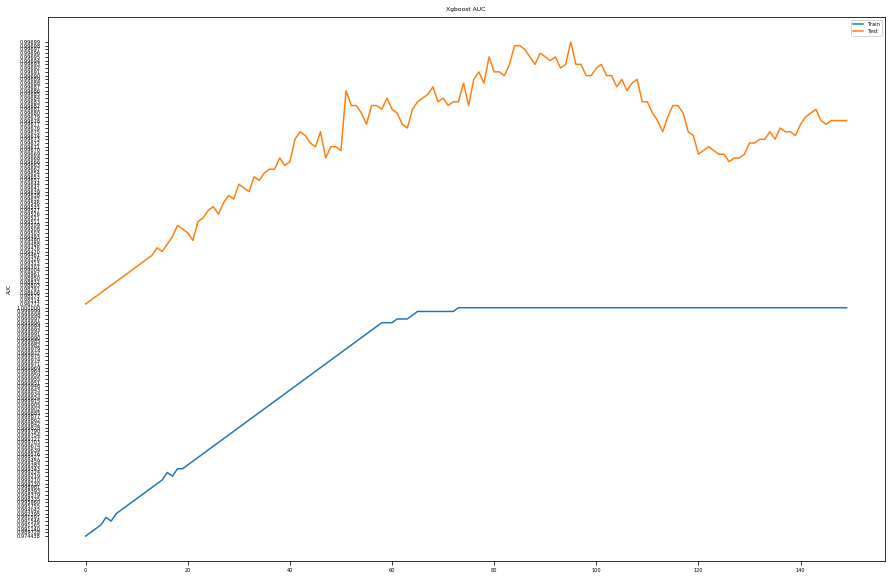

In [82]:
# change default figure and font size
plt.rcParams['figure.figsize'] = 15, 10
plt.rcParams['font.size'] = 5


history = model_xgb.evals_result_
x_axis = range(len(history['validation_0']['auc']))
plt.plot(x_axis, history['validation_0']['auc'], label = 'Train')
plt.plot(x_axis, history['validation_1']['auc'], label = 'Test')
plt.legend(loc = 'best')
plt.ylabel('AUC')
plt.title('Xgboost AUC')
plt.show()

In [98]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds, show_progress=False)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Disbursed'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(dtrain['Disbursed'].values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Disbursed'], dtrain_predprob))
                    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [ ]:
#### Step 1: Fix learning rate and number of estimators, tune only tree-based parameters

In [105]:
pipeline_gs = Pipeline([('scaler', StandardScaler()), ('classifier', XGBClassifier())])
parameters = {'classifier__learning_rate': [0.1], 'classifier__n_estimators': [10,20,30,40,50,60,80,100],
              'classifier__max_depth':[3],'classifier__min_child_weight':[1],
              'classifier__gamma':[0],'classifier__subsample':[1],
              'classifier__colsample_bytree':[1],'classifier__nthread':[-1],
              'classifier__colsample_bylevel':[1],
              'classifier__max_delta_step':[0],
              'classifier__objective':['binary:logistic'],
              'classifier__reg_alpha':[0],
              'classifier__reg_lambda':[1],
              'classifier__scale_pos_weight':[1],
              'classifier__seed':[0]
             }

In [116]:
from sklearn.grid_search import GridSearchCV
rfc1 = GridSearchCV(pipeline_gs, parameters)
rfc1.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('classifier', XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'classifier__learning_rate': [0.1], 'classifier__n_estimators': [80], 'classifier__max_depth': [5], 'classifier__min_child_weight': [5], 'classifier__gamma': [0, 0.1, 0.2, 0.5], 'classifier__subsample': [1], 'classifier__colsample_bytree': [1], 'classifier__nthread': [-1], 'classifier__c...': [0], 'classifier__reg_lambda': [1], 'classifier__scale_pos_weight': [1], 'classifier__seed': [0]},
       pre_dispatch='2*n_jobs',

In [117]:
print("Best score: %s" % (rfc1.best_score_))
print("Best parameter set: %s" % (rfc1.best_params_))

Best score: 0.9802683504340963
Best parameter set: {'classifier__colsample_bylevel': 1, 'classifier__colsample_bytree': 1, 'classifier__gamma': 0, 'classifier__learning_rate': 0.1, 'classifier__max_delta_step': 0, 'classifier__max_depth': 5, 'classifier__min_child_weight': 5, 'classifier__n_estimators': 80, 'classifier__nthread': -1, 'classifier__objective': 'binary:logistic', 'classifier__reg_alpha': 0, 'classifier__reg_lambda': 1, 'classifier__scale_pos_weight': 1, 'classifier__seed': 0, 'classifier__subsample': 1}


In [118]:
y_pred = rfc1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.32%


In [119]:
#Best parameter set: 'classifier__n_estimators': 80

#### Step 2: Tune max_depth and min_child_weight

In [120]:
pipeline_gs = Pipeline([('scaler', StandardScaler()), ('classifier', XGBClassifier())])

parameters = {'classifier__learning_rate': [0.1], 'classifier__n_estimators': [80],
              'classifier__max_depth':[2,3,5,7,10],'classifier__min_child_weight':[1,3,5,7],
              'classifier__gamma':[0],'classifier__subsample':[1],
              'classifier__colsample_bytree':[1],'classifier__nthread':[-1],
              'classifier__colsample_bylevel':[1],
              'classifier__max_delta_step':[0],
              'classifier__objective':['binary:logistic'],
              'classifier__reg_alpha':[0],
              'classifier__reg_lambda':[1],
              'classifier__scale_pos_weight':[1],
              'classifier__seed':[0]
             }

rfc2 = GridSearchCV(pipeline_gs, parameters)
rfc2.fit(X_train, y_train)
print("Best score: %s" % (rfc2.best_score_))
print("Best parameter set: %s" % (rfc2.best_params_))
y_pred = rfc2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print('---------------------')
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Best score: 0.9802683504340963
Best parameter set: {'classifier__colsample_bylevel': 1, 'classifier__colsample_bytree': 1, 'classifier__gamma': 0, 'classifier__learning_rate': 0.1, 'classifier__max_delta_step': 0, 'classifier__max_depth': 5, 'classifier__min_child_weight': 5, 'classifier__n_estimators': 80, 'classifier__nthread': -1, 'classifier__objective': 'binary:logistic', 'classifier__reg_alpha': 0, 'classifier__reg_lambda': 1, 'classifier__scale_pos_weight': 1, 'classifier__seed': 0, 'classifier__subsample': 1}
---------------------
Accuracy: 97.32%


In [121]:
#Best parameter set: 'classifier__max_depth': 5, 'classifier__min_child_weight': 5

#### Step 3: Tune gamma

In [122]:
pipeline_gs = Pipeline([('scaler', StandardScaler()), ('classifier', XGBClassifier())])

parameters = {'classifier__learning_rate': [0.1], 'classifier__n_estimators': [80],
              'classifier__max_depth':[5],'classifier__min_child_weight':[5],
              'classifier__gamma':[0,0.1,0.2,0.5],'classifier__subsample':[1],
              'classifier__colsample_bytree':[1],'classifier__nthread':[-1],
              'classifier__colsample_bylevel':[1],
              'classifier__max_delta_step':[0],
              'classifier__objective':['binary:logistic'],
              'classifier__reg_alpha':[0],
              'classifier__reg_lambda':[1],
              'classifier__scale_pos_weight':[1],
              'classifier__seed':[0]
             }
rfc3 = GridSearchCV(pipeline_gs, parameters)
rfc3.fit(X_train, y_train)
print("Best score: %s" % (rfc3.best_score_))
print("Best parameter set: %s" % (rfc3.best_params_))
print('\n')
y_pred = rfc3.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('---------------------')
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Best score: 0.9802683504340963
Best parameter set: {'classifier__colsample_bylevel': 1, 'classifier__colsample_bytree': 1, 'classifier__gamma': 0, 'classifier__learning_rate': 0.1, 'classifier__max_delta_step': 0, 'classifier__max_depth': 5, 'classifier__min_child_weight': 5, 'classifier__n_estimators': 80, 'classifier__nthread': -1, 'classifier__objective': 'binary:logistic', 'classifier__reg_alpha': 0, 'classifier__reg_lambda': 1, 'classifier__scale_pos_weight': 1, 'classifier__seed': 0, 'classifier__subsample': 1}


---------------------
Accuracy: 97.32%


In [123]:
#Best parameter set:'classifier__gamma': 0

#### Step 4: Tune subsample and colsample_bytree

In [128]:
pipeline_gs = Pipeline([('scaler', StandardScaler()), ('classifier', XGBClassifier())])
parameters = {'classifier__learning_rate': [0.1], 'classifier__n_estimators': [80],
              'classifier__max_depth':[5],'classifier__min_child_weight':[5],
              'classifier__gamma':[0],'classifier__subsample':[1],
              'classifier__colsample_bytree':[0.6,0.7,0.8,0.9,1.0],'classifier__nthread':[-1],
              'classifier__colsample_bylevel':[0.6,0.7,0.8,0.9,1.0],
              'classifier__max_delta_step':[0],
              'classifier__objective':['binary:logistic'],
              'classifier__reg_alpha':[0],
              'classifier__reg_lambda':[1],
              'classifier__scale_pos_weight':[1],
              'classifier__seed':[0]
             }
rfc4 = GridSearchCV(pipeline_gs, parameters)
rfc4.fit(X_train, y_train)
print("Best score: %s" % (rfc4.best_score_))
print("Best parameter set: %s" % (rfc4.best_params_))
print('\n')
y_pred = rfc4.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('---------------------')
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Best score: 0.9806629834254144
Best parameter set: {'classifier__colsample_bylevel': 0.7, 'classifier__colsample_bytree': 0.6, 'classifier__gamma': 0, 'classifier__learning_rate': 0.1, 'classifier__max_delta_step': 0, 'classifier__max_depth': 5, 'classifier__min_child_weight': 5, 'classifier__n_estimators': 80, 'classifier__nthread': -1, 'classifier__objective': 'binary:logistic', 'classifier__reg_alpha': 0, 'classifier__reg_lambda': 1, 'classifier__scale_pos_weight': 1, 'classifier__seed': 0, 'classifier__subsample': 1}


---------------------
Accuracy: 97.48%


In [ ]:
#Best parameter set:'classifier__colsample_bylevel': 0.7, 'classifier__colsample_bytree': 0.6

#### Step 5: Tuning Regularization Parameters

In [129]:
pipeline_gs = Pipeline([('scaler', StandardScaler()), ('classifier', XGBClassifier())])
parameters = {'classifier__learning_rate': [0.1], 'classifier__n_estimators': [80],
              'classifier__max_depth':[5],'classifier__min_child_weight':[5],
              'classifier__gamma':[0],'classifier__subsample':[1],
              'classifier__colsample_bytree':[0.6],'classifier__nthread':[-1],
              'classifier__colsample_bylevel':[0.7],
              'classifier__max_delta_step':[0],
              'classifier__objective':['binary:logistic'],
              'classifier__reg_alpha':[1e-3, 1e-2, 0.1, 1, 100],
              'classifier__reg_lambda':[1],
              'classifier__scale_pos_weight':[1],
              'classifier__seed':[0]
             }
rfc4 = GridSearchCV(pipeline_gs, parameters)
rfc4.fit(X_train, y_train)
print("Best score: %s" % (rfc4.best_score_))
print("Best parameter set: %s" % (rfc4.best_params_))
print('\n')
y_pred = rfc4.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('---------------------')
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Best score: 0.9806629834254144
Best parameter set: {'classifier__colsample_bylevel': 0.7, 'classifier__colsample_bytree': 0.6, 'classifier__gamma': 0, 'classifier__learning_rate': 0.1, 'classifier__max_delta_step': 0, 'classifier__max_depth': 5, 'classifier__min_child_weight': 5, 'classifier__n_estimators': 80, 'classifier__nthread': -1, 'classifier__objective': 'binary:logistic', 'classifier__reg_alpha': 0.001, 'classifier__reg_lambda': 1, 'classifier__scale_pos_weight': 1, 'classifier__seed': 0, 'classifier__subsample': 1}


---------------------
Accuracy: 97.48%


In [127]:
#Best parameter set: 'classifier__reg_alpha': 0.001

#### Step 6: Reducing Learning Rate

In [130]:
pipeline_gs = Pipeline([('scaler', StandardScaler()), ('classifier', XGBClassifier())])
parameters = {'classifier__learning_rate': [0.001,0.01,0.1,0.5], 'classifier__n_estimators': [80],
              'classifier__max_depth':[5],'classifier__min_child_weight':[5],
              'classifier__gamma':[0],'classifier__subsample':[1],
              'classifier__colsample_bytree':[0.6],'classifier__nthread':[-1],
              'classifier__colsample_bylevel':[0.7],
              'classifier__max_delta_step':[0],
              'classifier__objective':['binary:logistic'],
              'classifier__reg_alpha':[0.001],
              'classifier__reg_lambda':[1],
              'classifier__scale_pos_weight':[1],
              'classifier__seed':[0]
             }
clf6 = GridSearchCV(pipeline_gs, parameters)
clf6.fit(X_train, y_train)
print("Best score: %s" % (clf6.best_score_))
print("Best parameter set: %s" % (clf6.best_params_))
print('\n')
y_pred = clf6.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('---------------------')
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Best score: 0.9806629834254144
Best parameter set: {'classifier__colsample_bylevel': 0.7, 'classifier__colsample_bytree': 0.6, 'classifier__gamma': 0, 'classifier__learning_rate': 0.1, 'classifier__max_delta_step': 0, 'classifier__max_depth': 5, 'classifier__min_child_weight': 5, 'classifier__n_estimators': 80, 'classifier__nthread': -1, 'classifier__objective': 'binary:logistic', 'classifier__reg_alpha': 0.001, 'classifier__reg_lambda': 1, 'classifier__scale_pos_weight': 1, 'classifier__seed': 0, 'classifier__subsample': 1}


---------------------
Accuracy: 97.48%


In [131]:
#Best parameter set: 'classifier__learning_rate': 0.1

# Final XGBoost model:

In [21]:
import xgboost
from xgboost.sklearn import XGBClassifier
from xgboost.sklearn import XGBRegressor

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split  
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score

from xgboost import plot_importance
from matplotlib import pyplot
import pprint
%matplotlib inline

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

from scipy.stats import randint

from sklearn.grid_search import GridSearchCV

In [22]:
pipeline_gs = Pipeline([('scaler', StandardScaler()), ('classifier', XGBClassifier())])
parameters = {'classifier__learning_rate': [0.1], 'classifier__n_estimators': [80],
              'classifier__max_depth':[5],'classifier__min_child_weight':[5],
              'classifier__gamma':[0],'classifier__subsample':[1],
              'classifier__colsample_bytree':[0.6],'classifier__nthread':[-1],
              'classifier__colsample_bylevel':[0.7],
              'classifier__max_delta_step':[0],
              'classifier__objective':['binary:logistic'],
              'classifier__reg_alpha':[0.001],
              'classifier__reg_lambda':[1],
              'classifier__scale_pos_weight':[1],
              'classifier__seed':[0]
             }
clf_f = GridSearchCV(pipeline_gs, parameters)
clf_f.fit(X_train, y_train)
print("Best score: %s" % (clf_f.best_score_))
print("Best parameter set: %s" % (clf_f.best_params_))
print('\n')
y_pred = clf_f.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('---------------------')
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Best score: 0.6410256410256411
Best parameter set: {'classifier__colsample_bylevel': 1, 'classifier__colsample_bytree': 1, 'classifier__gamma': 0.5, 'classifier__learning_rate': 0.1, 'classifier__max_delta_step': 0, 'classifier__max_depth': 3, 'classifier__min_child_weight': 7, 'classifier__n_estimators': 80, 'classifier__nthread': -1, 'classifier__objective': 'binary:logistic', 'classifier__reg_alpha': 0.01, 'classifier__reg_lambda': 1, 'classifier__scale_pos_weight': 1, 'classifier__seed': 0, 'classifier__subsample': 1}


---------------------
Accuracy: 64.32%


In [23]:
print(confusion_matrix(y_test,y_pred))
accuracy=confusion_matrix(y_test,y_pred).trace()/confusion_matrix(y_test,y_pred).sum()
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[[797 511]
 [397 840]]
Accuracy: 64.32%


In [24]:
# [[797 511]
# [397 840]]
# Accuracy: 64.32%

## Neural Network

In [345]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, KFold

# finding a best combination of hidden nodes number and alpha using 5-fold cross validation
alphaList = [0.001,0.01,0.1,1,10]
numNodesList = [20,30,40,50,60,70,80,90,100]
ccr = pd.DataFrame(({"alpha":[],"numNodes":[],"score":[]}))

kfold = KFold(n_splits=10,random_state=1)
for alpha in alphaList:
    for numNodes in numNodesList:
        nn = MLPClassifier(hidden_layer_sizes=numNodes, activation="logistic", alpha=alpha, solver="lbfgs", random_state=1)
        nn.fit(cancer_data,y=cancer_target)
        scores = cross_val_score(nn, X=cancer_data, y=cancer_target, cv=kfold)
        ccr = ccr.append(pd.Series((alpha, numNodes, scores.mean()), index=["alpha", "numNodes", "score"]), ignore_index=True)
        print(str(alpha)+" "+str(numNodes)+" finished")

ccr[ccr.score == ccr.score.max()]
ccr.to_csv("ccr_neural_network",index=False,encoding="utf-8")

# neural network with alpha = 0.01, one hidden layer with 20 hidden nodes, logistic form for both hidden and output layer
nn = MLPClassifier(hidden_layer_sizes=20,activation="logistic",alpha=0.01,solver="lbfgs",random_state=1)
nn.fit(X=cancer_data,y=cancer_target)
cross_val_score(nn, X=cancer_data, y=cancer_target, cv=kfold)

0.001 20 finished
0.001 30 finished
0.001 40 finished
0.001 50 finished
0.001 60 finished
0.001 70 finished
0.001 80 finished
0.001 90 finished
0.001 100 finished
0.01 20 finished
0.01 30 finished
0.01 40 finished
0.01 50 finished
0.01 60 finished
0.01 70 finished
0.01 80 finished
0.01 90 finished
0.01 100 finished
0.1 20 finished
0.1 30 finished
0.1 40 finished
0.1 50 finished
0.1 60 finished
0.1 70 finished
0.1 80 finished
0.1 90 finished
0.1 100 finished
1 20 finished
1 30 finished
1 40 finished
1 50 finished
1 60 finished
1 70 finished
1 80 finished
1 90 finished
1 100 finished
10 20 finished
10 30 finished
10 40 finished
10 50 finished
10 60 finished
10 70 finished
10 80 finished
10 90 finished
10 100 finished


array([ 0.63707777,  0.62765122,  0.62136685,  0.62765122,  0.60691824,
        0.62893082,  0.63443396,  0.61713836,  0.63600629,  0.62893082])

In [45]:
a=[ 0.63707777,  0.62765122,  0.62136685,  0.62765122,  0.60691824,0.62893082,  0.63443396,  0.61713836,  0.63600629,  0.62893082]

In [51]:
np.mean(a)

0.62661055499999996

## Conclusion: best model is XGBoost

In [348]:
# Now we include the data where survival_1_year = 0, 
#for which cases we will directly assign survival_7_years to be 0
#since these samples already died in 1 year.

In [351]:
cancer_final=cancer

cancer_final['survival_7_years_pred']=clf_f.predict(cancer_final.drop(['id','survival_7_years'],axis=1))
cancer_final.loc[cancer_final.survival_1_year==0,'survival_7_years_pred']=0

In [353]:
f_accuracy=len(cancer_final[cancer_final.survival_7_years==cancer_final.survival_7_years_pred])/len(cancer_final['survival_7_years'])

print("Final Accuracy: %.2f%%" % (f_accuracy * 100.0))

Final Accuracy: 69.94%


In [ ]:
# Final Accuracy: 69.94%

# Predictions on Test Set

In [30]:
test = pd.read_csv("testNew.csv", index_col=0)
#test.head()
test_1yrgreater = test[test.survival_1_year != 0]
test_data=test_1yrgreater.drop(['survival_7_years','id.1'],axis=1)
test_target=test_1yrgreater.survival_7_years

In [31]:
test_pred = clf_f.predict(test_data)

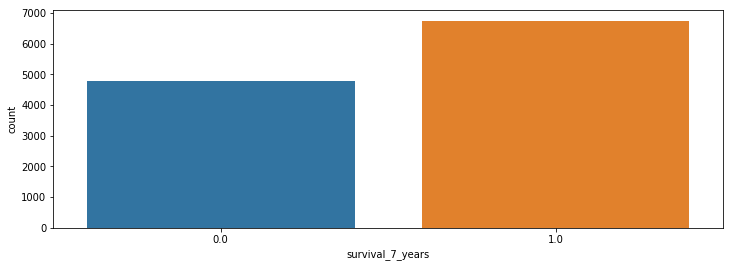

In [40]:
prediction_df=pd.DataFrame(data=[test_pred,list(test_1yrgreater['id.1'])])
prediction_df_final=prediction_df.transpose()
prediction_df_final.columns=["prediction","id.1"]
prediction_df_final.index=prediction_df_final['id.1']
test.index=test['id.1']
test.loc[prediction_df_final['id.1'],"survival_7_years"]=list(prediction_df_final.prediction)
test.loc[test.survival_1_year == 0,"survival_7_years"]=0
sns.countplot(test['survival_7_years'])

In [41]:
test.describe()

,id.1,tumor_speed,psa_speed,survival_7_years,gleason_score,age,race,side_right,side_left,side_both,...,family_history_new,first_degree_history_new,previous_cancer_new,weight_new,height_new,BMI,tumor_diagnosis_imp,psa_diagnosis_imp,tumor_1_year_imp,psa_1_year_imp
count,11531.000000,11531.000000,11531.000000,11531.000000,11531.000000,11531.000000,11531.000000,11531.000000,11531.000000,11531.000000,...,11531.000000,11531.000000,11531.000000,11531.000000,11531.000000,11531.000000,11531.000000,11531.00000,11531.000000,11531.000000
mean,25766.000000,0.666707,0.744999,0.584685,7.247854,76.899315,3.466135,0.301015,0.198942,0.500043,...,0.378111,0.191831,0.067037,176.612870,69.140664,0.027973,46.617553,11.64376,34.785621,9.027994
std,3328.857311,0.498252,0.477358,0.492798,1.930708,9.331628,0.965651,0.458719,0.399222,0.500022,...,0.594090,0.438565,0.250096,16.691715,1.107799,0.004440,17.970462,4.02258,30.427720,5.666281
min,20001.000000,0.000000,0.000000,0.000000,3.000000,35.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,123.000000,65.000000,0.008477,4.000000,1.20000,0.000000,0.000000
25%,22883.500000,0.218750,0.514599,0.000000,6.000000,72.000000,3.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,167.000000,68.000000,0.026200,35.000000,8.60000,8.000000,5.300000
50%,25766.000000,0.672727,0.748092,1.000000,7.000000,78.000000,4.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,173.000000,69.000000,0.028462,43.000000,11.60000,31.000000,8.900000
75%,28648.500000,1.023256,0.960000,1.000000,9.000000,84.000000,4.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,180.000000,70.000000,0.030465,55.000000,14.60000,52.000000,12.000000
max,31531.000000,3.465116,13.913043,1.000000,14.000000,108.000000,4.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,1.000000,317.000000,74.000000,0.055488,192.000000,28.00000,201.000000,35.000000


In [42]:
test.to_csv("mengyusun_score.csv")